# Housing Prices Problem 

In [349]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings
warnings.filterwarnings('ignore')



In [159]:
# Reading dataset
pricing_data = pd.read_csv('/Users/vernica.ahuja/Downloads/Advanced_regression/train.csv')

In [160]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [161]:
pricing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
pricing_data.shape

(1460, 81)

In [163]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [164]:
pricing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [165]:
pricing_data.drop_duplicates(inplace=True)

In [166]:
pricing_data.shape

(1460, 81)

In [167]:
# Find null values for each field
round(pricing_data.isnull().sum()/len(pricing_data.index),4)*100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [168]:
# Drop variables with more than 80% null values
pricing_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [169]:
pricing_data.shape

(1460, 77)

In [170]:
#check missing values again
pricing_data.isnull().sum()[pricing_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [171]:
pricing_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [172]:
pricing_data.LotFrontage.median()

69.0

In [173]:
# impute missing values with median
pricing_data.LotFrontage = pricing_data.LotFrontage.fillna(pricing_data.LotFrontage.median())

In [174]:
pricing_data.MasVnrArea = pricing_data.MasVnrArea.fillna(pricing_data.MasVnrArea.median())

In [175]:
#pricing_data.BsmtExposure = pricing_data.BsmtExposure.fillna(pricing_data.BsmtExposure.median())

In [176]:
#replace Nan values of MasVnrArea with None
pricing_data.MasVnrType = pricing_data.MasVnrType.fillna('None')

In [177]:
#replace Nan values of BsmtQual with NA i.e. No Basement
pricing_data.BsmtQual = pricing_data.BsmtQual.fillna('NA')
#replace Nan values of BsmtCond with NA i.e. No Basement
pricing_data.BsmtCond = pricing_data.BsmtCond.fillna('NA')
#replace Nan values of BsmtExposure with No i.e. No Exposure
pricing_data.BsmtExposure = pricing_data.BsmtExposure.fillna('No')
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
pricing_data.BsmtFinType1 = pricing_data.BsmtFinType1.fillna('NA')
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
pricing_data.BsmtFinType2 = pricing_data.BsmtFinType2.fillna('NA')

In [178]:
#impute missing values of Electrical with mode due to categorical column
pricing_data.Electrical = pricing_data.Electrical.fillna(pricing_data.Electrical.mode()[0])    

In [179]:
#replace Nan values of GarageType with NA i.e. No Garage
pricing_data.GarageType = pricing_data.GarageType.fillna('NA')
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
pricing_data.GarageYrBlt = pricing_data.GarageYrBlt.fillna(0)
#replace Nan values of GarageFinish with NA i.e. No Garage
pricing_data.GarageFinish = pricing_data.GarageFinish.fillna('NA')
#replace Nan values of GarageQual with NA i.e. No Garage
pricing_data.GarageQual = pricing_data.GarageQual.fillna('NA')
#replace Nan values of GarageFinish with NA i.e. No Garage
pricing_data.GarageQual = pricing_data.GarageQual.fillna('NA')
#replace Nan values of GarageCond with NA i.e. No Garage
pricing_data.GarageCond = pricing_data.GarageCond.fillna('NA')
#replace Nan values of GarageCond with NA i.e. No Fireplace
pricing_data.FireplaceQu = pricing_data.FireplaceQu.fillna('NA')

In [180]:
#check missing values again
pricing_data.isnull().sum()[pricing_data.isnull().sum()>0]

Series([], dtype: int64)

## EDA on numeric data

In [181]:
numeric_data = pricing_data.select_dtypes(include=['float64', 'int64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [182]:
numeric_data = numeric_data.drop(['Id'], axis=1)
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

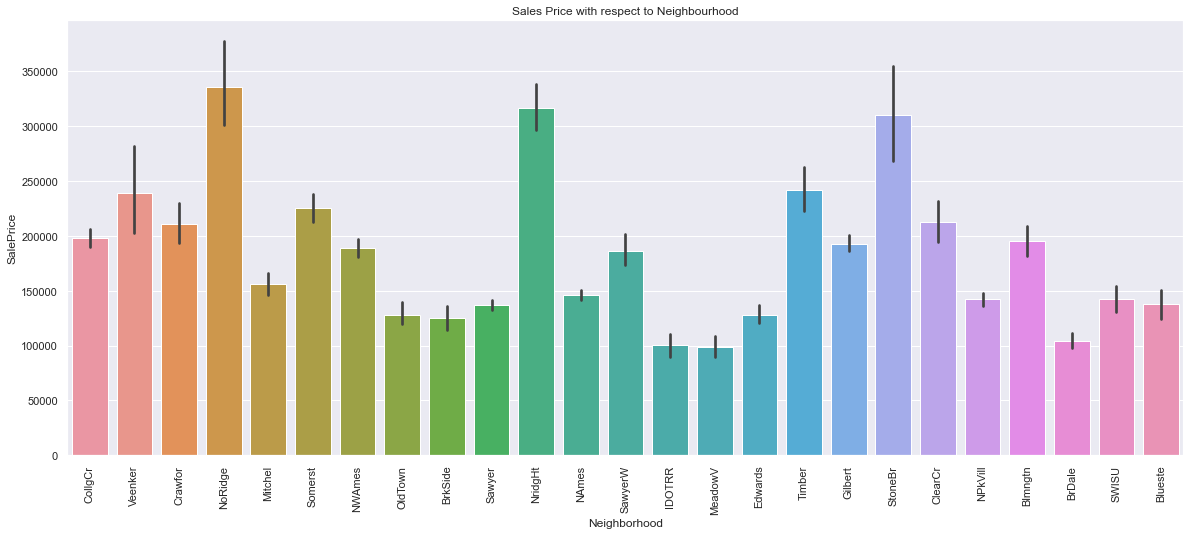

In [183]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= pricing_data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

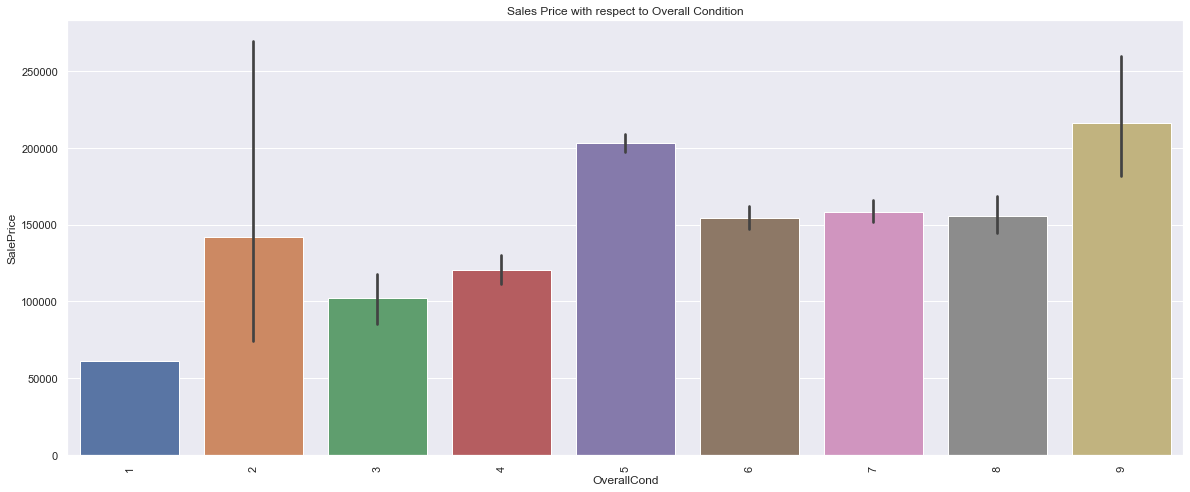

In [184]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= pricing_data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

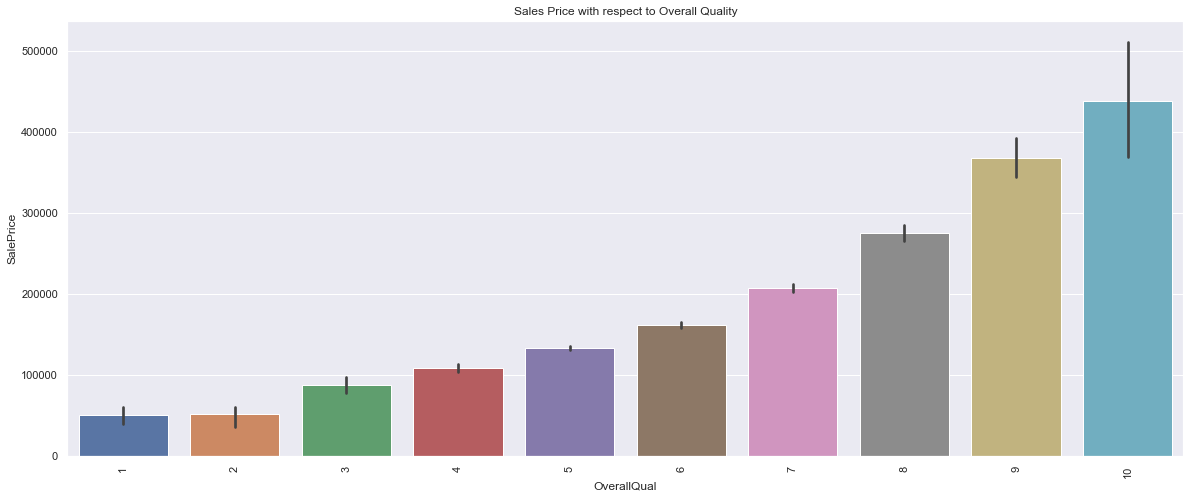

In [185]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= pricing_data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

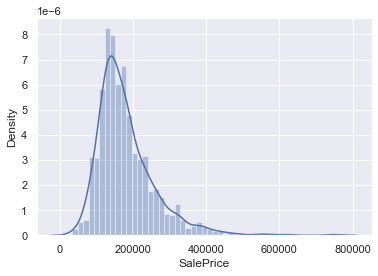

In [186]:
sns.distplot(pricing_data['SalePrice'])

In [187]:
# SalePrice is right skewed, thus we need to transform it to make it normally distributed
pricing_data['SalePrice']=np.log1p(pricing_data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

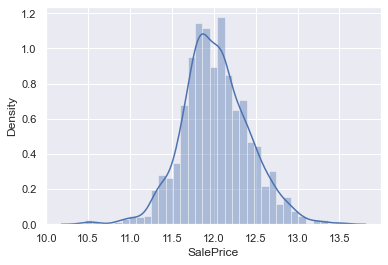

In [188]:
sns.distplot(pricing_data['SalePrice'])

In [189]:
# Correlation of numerical variables with each other and target variable
cor = data_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.02645

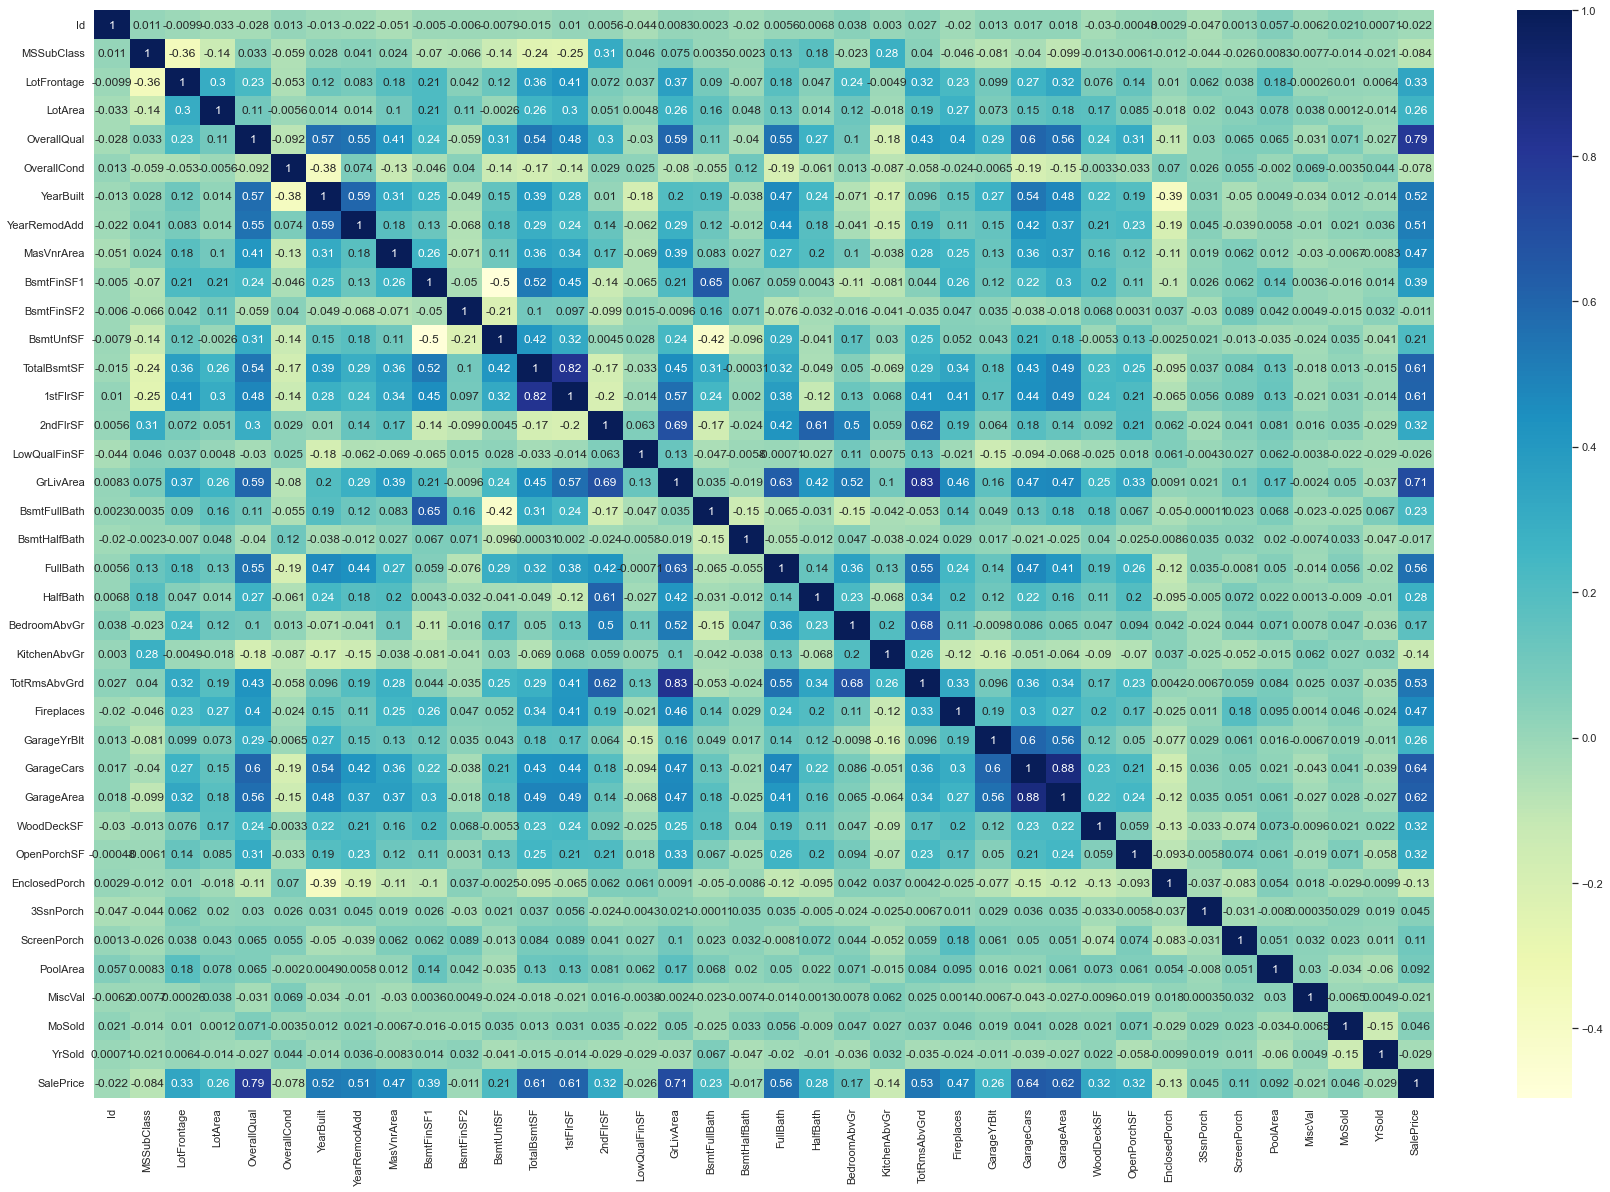

In [190]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

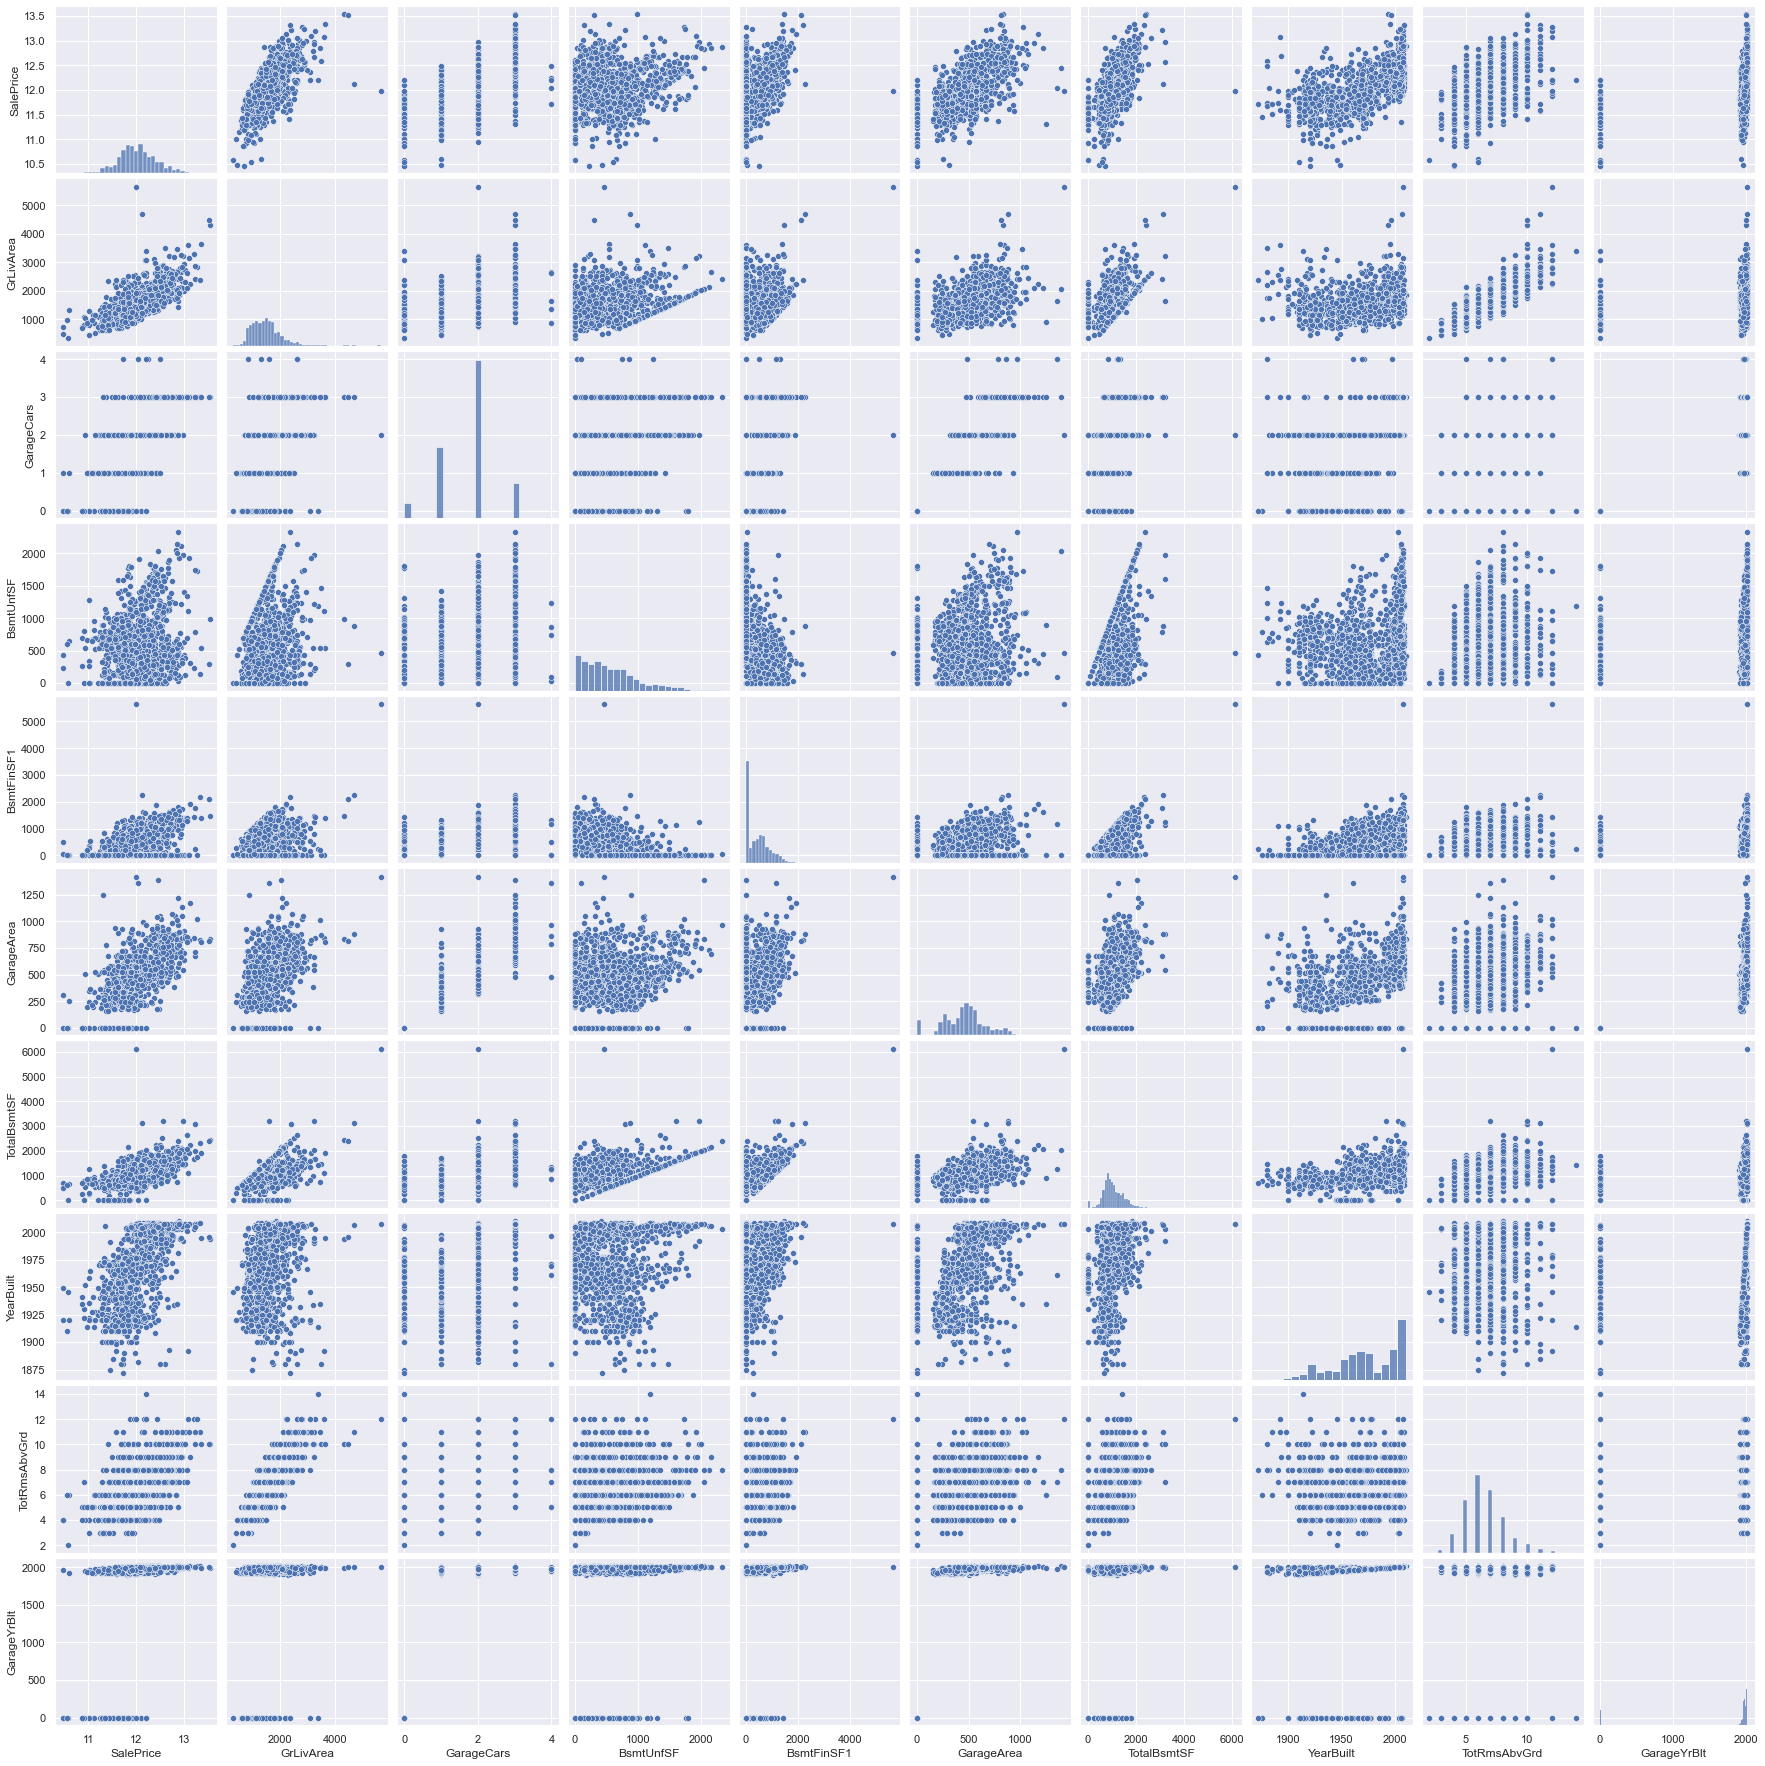

In [191]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF',
        'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(pricing_data[cols], size = 2.5)
plt.show()

In [192]:
pricing_data = pricing_data.drop(['GarageCars'], axis = 1)
pricing_data = pricing_data.drop(['BsmtUnfSF'], axis = 1)
pricing_data = pricing_data.drop(['TotRmsAbvGrd'], axis = 1)
pricing_data = pricing_data.drop(['GarageYrBlt'], axis = 1)    

pricing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [193]:
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [210]:
# sns.set()
# cols = ['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
#        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#        'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
#         'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
#        'MoSold', 'YrSold']
# sns.pairplot(pricing_data[cols], size = 2.5)
# plt.show()

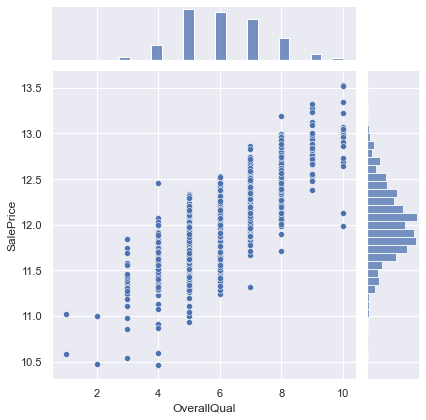

In [195]:
sns.jointplot(x='OverallQual', y='SalePrice', data=pricing_data)
plt.show()

In [197]:
# Derive column - property age
pricing_data['Property_Age'] = (pricing_data['YrSold'] - pricing_data['YearBuilt'])
pricing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Property_Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220,8


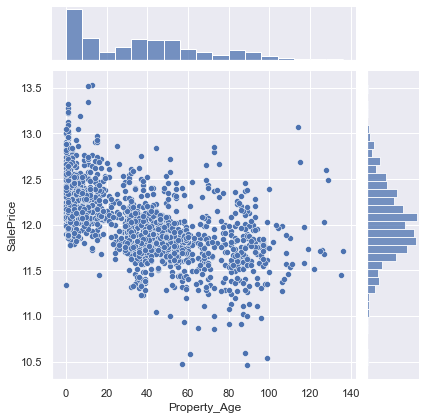

In [198]:
# Drop the YrSold & YearBuilt
sns.jointplot(x = pricing_data['Property_Age'], y = pricing_data['SalePrice'])
plt.show()

#### Increase in PropertyAge reduces the SalePrice

In [199]:
# Dropping YrSold & YearBuilt
pricing_data = pricing_data.drop(['YrSold'], axis = 1)
pricing_data = pricing_data.drop(['YearBuilt'], axis = 1)

In [200]:
pricing_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [201]:
categorical_type = pricing_data.dtypes[pricing_data.dtypes == object]

In [202]:
categorical_type

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [203]:
# Checking split of data in each categorical variable
for c in pricing_data.columns:
    if pricing_data[c].dtype == np.object :
        print(c)
        print((pricing_data[c].value_counts(normalize=True))*100)

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Street
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.97

In [204]:
# Checking split of data in each categorical variable
(pricing_data.MSZoning.value_counts()/len(pricing_data))*100

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Lvl'), Text(1, 0, 'Bnk'), Text(2, 0, 'Low'), Text(3, 0, 'HLS')])

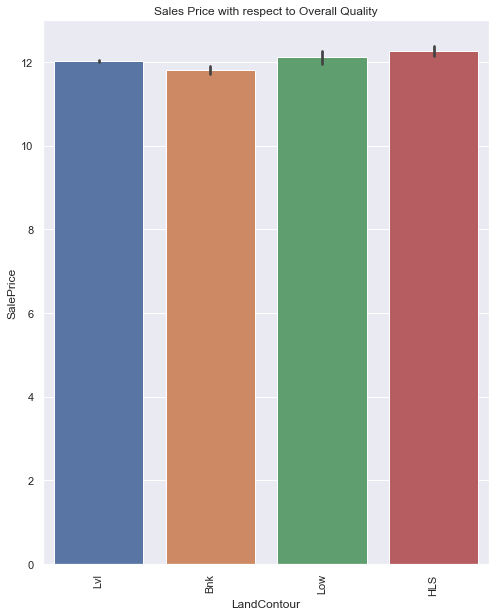

In [205]:
plt.figure(figsize=(8, 10))
sns.barplot(x="LandContour", y="SalePrice", data= pricing_data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

In [206]:
# Drop Variables where data is skewed
pricing_data = pricing_data.drop(['Street'], axis = 1)
pricing_data = pricing_data.drop(['LandContour'], axis = 1)
pricing_data = pricing_data.drop(['Utilities'], axis = 1)
pricing_data = pricing_data.drop(['LandSlope'], axis = 1)
pricing_data = pricing_data.drop(['Condition1'], axis = 1)
pricing_data = pricing_data.drop(['Condition2'], axis = 1)
pricing_data = pricing_data.drop(['RoofMatl'], axis = 1)
pricing_data = pricing_data.drop(['BsmtCond'], axis = 1)
pricing_data = pricing_data.drop(['Heating'], axis = 1)
pricing_data = pricing_data.drop(['CentralAir'], axis = 1)
pricing_data = pricing_data.drop(['Electrical'], axis = 1)
pricing_data = pricing_data.drop(['Functional'], axis = 1)
pricing_data = pricing_data.drop(['GarageQual'], axis = 1)
pricing_data = pricing_data.drop(['GarageCond'], axis = 1)
pricing_data = pricing_data.drop(['PavedDrive'], axis = 1)
pricing_data = pricing_data.drop(['BldgType'], axis = 1)
pricing_data = pricing_data.drop(['BsmtFinType2'], axis = 1)
pricing_data = pricing_data.drop(['SaleType'], axis = 1)
pricing_data = pricing_data.drop(['SaleCondition'], axis = 1)

In [207]:
pricing_data = pricing_data.drop(['Id'], axis = 1)

In [145]:
pricing_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinSF2         int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [217]:
pricing_data.shape

(1460, 52)

In [208]:
numeric_cols = pricing_data.dtypes[(pricing_data.dtypes == 'int64') | (pricing_data.dtypes == float)] 

categorical_cols = pricing_data.dtypes[pricing_data.dtypes == object]

In [216]:
numeric_cols

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
Fireplaces         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
SalePrice        float64
Property_Age       int64
dtype: object

In [242]:
numeric_cols.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Property_Age'],
      dtype='object')

In [223]:
categorical_cols

MSZoning        object
LotShape        object
LotConfig       object
Neighborhood    object
HouseStyle      object
RoofStyle       object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
ExterQual       object
ExterCond       object
Foundation      object
BsmtQual        object
BsmtExposure    object
BsmtFinType1    object
HeatingQC       object
KitchenQual     object
FireplaceQu     object
GarageType      object
GarageFinish    object
dtype: object

In [240]:
cols=categorical_cols.index

In [251]:
numeric_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Property_Age']

In [252]:
categorical_cols = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish']

### Dummy variables of Categorical variables

In [253]:
pricing_data = pd.get_dummies(pricing_data, drop_first=True )
pricing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Property_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,2003,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,12.247699,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,12.109016,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,12.317171,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,11.849405,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,350.0,655,0,1145,1145,1053,0,2198,1,0,2

In [254]:
X = pricing_data.drop(['SalePrice'], axis=1)

In [255]:
y = pricing_data['SalePrice']

In [256]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [257]:
scaler = StandardScaler()

In [258]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [155]:


X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property_Age']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property_Age']])

In [264]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Property_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,0.043512,-0.293313,-0.430911,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.925422,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,1.529604,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.809137,1.160345,-0.293313,0.621579,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0.623522,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.677573,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,-0.761296,-0.293313,-0.712011,-0.930972,0.795996,-0.124502,-0.056465,-0.837450,-0.247791,-1.026085,1.246998,0.176772,-0.234155,0.623522,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,0.936631,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [266]:
X_train.shape

(1021, 156)

### Training the model

In [265]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [268]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)

In [269]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 15),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 26),
 ('BsmtFinSF1', False, 39),
 ('BsmtFinSF2', False, 38),
 ('TotalBsmtSF', False, 37),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 50),
 ('FullBath', True, 1),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 44),
 ('Fireplaces', False, 25),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 13),
 ('OpenPorchSF', False, 28),
 ('EnclosedPorch', False, 20),
 ('3SsnPorch', False, 48),
 ('ScreenPorch', False, 16),
 ('PoolArea', True, 1),
 ('MiscVal', False, 46),
 ('MoSold', False, 53),
 ('Property_Age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', True, 1)

In [270]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'GarageArea', 'PoolArea', 'Property_Age',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SLvl',
       'RoofStyle_Gable', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFa

In [271]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_SFoyer', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Stone', 'Exterior1st_Wd Sdng', 'Exterior2nd_BrkFace',
       'Exterior2nd_Stone', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Fa', 'BsmtExposure_Mn',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ'

In [272]:
X_train_rfe = X_train[col]

In [342]:
X_train_rfe.shape

(1021, 101)

In [278]:
X_train_rfe = sm.add_constant(X_train_rfe)
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:41:17   Log-Likelihood:                 727.43
No. Observations:                1021   AIC:                            -1267.
Df Residuals:                     927   BIC:                            -803.6
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8802      0.118    100.522      0.000      11.648      12.112
MSSubClass              -0.0227      0.006     -4.028      0.000      -0.034      -0.012
LotArea                  0.0192      0.005      3.966      0.000       0.010       0.029
OverallQual              0.0703      0.008      8.391      0.000       0.054       0.087
OverallCond              0.0378      0.006      6.834      0.000       0.027       0.049
YearRemodAdd             0.0284      0.007      4.272      0.000       0.015       0.041
1stFlrSF                 0.0300      0.006      5.436      0.000       0.019       0.041
2ndFlrSF                 0.0508      0.006      7.862      0.000       0.038       0.064
LowQualFinSF             0.0042      0.005      0.879      0.380      -0.005       0.014
GrLivArea                0.0645      0.005     12.973      0.000       0.055       0.074
BsmtFullBath             0.0241      0.005      4.659      0.000       0.014       0.034
FullBath                 0.0144      0.007      2.199      0.028       0.002       0.027
BedroomAbvGr             0.0203      0.006      3.514      0.000       0.009       0.032
GarageArea               0.0350      0.007      5.164      0.000       0.022       0.048
PoolArea                -0.0195      0.004     -4.430      0.000      -0.028      -0.011
Property_Age            -0.0377      0.011     -3.350      0.001      -0.060      -0.016
MSZoning_FV              0.4049      0.065      6.215      0.000       0.277       0.533
MSZoning_RH              0.4058      0.064      6.346      0.000       0.280       0.531
MSZoning_RL              0.4147      0.052      7.949      0.000       0.312       0.517
MSZoning_RM              0.3602      0.053      6.781      0.000       0.256       0.464
LotShape_IR2             0.0243      0.025      0.976      0.329      -0.025       0.073
LotShape_IR3            -0.1554      0.046     -3.389      0.001      -0.245      -0.065
LotConfig_CulDSac        0.0346      0.017      1.990      0.047       0.000       0.069
LotConfig_FR2           -0.0559      0.024     -2.296      0.022      -0.104      -0.008
LotConfig_FR3           -0.0414      0.075     -0.555      0.579      -0.188       0.105
Neighborhood_Blueste    -0.0339      0.129     -0.263      0.792      -0.286       0.218
Neighborhood_BrDale     -0.0499      0.045     -1.106      0.269      -0.139       0.039
Neighborhood_BrkSide     0.0421      0.025      1.657      0.098      -0.008       0.092
Neighborhood_ClearCr     0.0863      0.032      2.735      0.006       0.024       0.148
Neighborhood_Crawfor     0.1714      0.026      6.593      0.000       0.120       0.222
Neighborhood_Edwards    -0.0867      0.018     -4.798      0.000      -0.122      -0.051
Neighborhood_MeadowV    -0.1685      0.055     -3.080    

In [273]:
X_train_rfe = pd.DataFrame(X_train[col])

In [274]:
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,GarageArea,PoolArea,Property_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SLvl,RoofStyle_Gable,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_CarPort,GarageType_NA,GarageFinish_NA,GarageFinish_Unf
210,-0.657071,-0.473765,-0.779861,0.383154,-1.694350,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-1.026085,-1.042717,-2.217786,-0.062302,1.529604,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0
318,0.035976,-0.056845,0.649651,-0.533005,0.390956,0.511914,2.140556,-0.124502,2.123103,1.066863,0.786428,1.396261,0.867506,-0.062302,-0.677573,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
239,-0.195040,-0.169324,-0.065105,-1.449164,-1.694350,-0.930972,0.795996,-0.124502,-0.056465,-0.837450,-1.026085,0.176772,-1.183084,-0.062302,0.936631,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1
986,-0.195040,-0.502297,-0.065105,2.215472,0.875911,-0.420683,0.669584,-0.124502,0.221858,-0.837450,-1.026085,-1.042717,-1.018473,-0.062302,1.957862,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1416,3.039179,0.082905,-1.494617,0.383154,-1.694350,0.195183,1.611926,-0.124502,1.453624,-0.837450,0.786428,1.396261,0.416000,-0.062302,2.913207,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [275]:
X_train_rfe.shape

(1021, 100)

In [276]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9152877292163215

In [277]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.2617840585772676e+30

#### R2 is negative which is too low and the model is not optimal

In [292]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
49,Exterior1st_CBlock,inf
46,Exterior1st_AsphShn,inf
99,GarageFinish_NA,inf
98,GarageType_NA,inf
84,BsmtFinType1_NA,inf
80,BsmtQual_NA,inf
6,1stFlrSF,inf
7,2ndFlrSF,inf
8,LowQualFinSF,inf
9,GrLivArea,inf


In [293]:
# Drop Exterior1st_CBlock first
X_train_new = X_train_rfe.drop(['Exterior1st_CBlock'],axis=1)

In [294]:
X_train_new.columns

Index(['const', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'GarageArea', 'PoolArea',
       'Property_Age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior

In [295]:
X_train_lm = sm.add_constant(X_train_new)

In [296]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [297]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:46:14   Log-Likelihood:                 727.43
No. Observations:                1021   AIC:                            -1267.
Df Residuals:                     927   BIC:                            -803.6
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8802      0.118    100.522      0.000      11.648      12.112
MSSubClass              -0.0227      0.006     -4.028      0.000      -0.034      -0.012
LotArea                  0.0192      0.005      3.966      0.000       0.010       0.029
OverallQual              0.0703      0.008      8.391      0.000       0.054       0.087
OverallCond              0.0378      0.006      6.834      0.000       0.027       0.049
YearRemodAdd             0.0284      0.007      4.272      0.000       0.015       0.041
1stFlrSF                 0.0300      0.006      5.436      0.000       0.019       0.041
2ndFlrSF                 0.0508      0.006      7.862      0.000       0.038       0.064
LowQualFinSF             0.0042      0.005      0.879      0.380      -0.005       0.014
GrLivArea                0.0645      0.005     12.973      0.000       0.055       0.074
BsmtFullBath             0.0241      0.005      4.659      0.000       0.014       0.034
FullBath                 0.0144      0.007      2.199      0.028       0.002       0.027
BedroomAbvGr             0.0203      0.006      3.514      0.000       0.009       0.032
GarageArea               0.0350      0.007      5.164      0.000       0.022       0.048
PoolArea                -0.0195      0.004     -4.430      0.000      -0.028      -0.011
Property_Age            -0.0377      0.011     -3.350      0.001      -0.060      -0.016
MSZoning_FV              0.4049      0.065      6.215      0.000       0.277       0.533
MSZoning_RH              0.4058      0.064      6.346      0.000       0.280       0.531
MSZoning_RL              0.4147      0.052      7.949      0.000       0.312       0.517
MSZoning_RM              0.3602      0.053      6.781      0.000       0.256       0.464
LotShape_IR2             0.0243      0.025      0.976      0.329      -0.025       0.073
LotShape_IR3            -0.1554      0.046     -3.389      0.001      -0.245      -0.065
LotConfig_CulDSac        0.0346      0.017      1.990      0.047       0.000       0.069
LotConfig_FR2           -0.0559      0.024     -2.296      0.022      -0.104      -0.008
LotConfig_FR3           -0.0414      0.075     -0.555      0.579      -0.188       0.105
Neighborhood_Blueste    -0.0339      0.129     -0.263      0.792      -0.286       0.218
Neighborhood_BrDale     -0.0499      0.045     -1.106      0.269      -0.139       0.039
Neighborhood_BrkSide     0.0421      0.025      1.657      0.098      -0.008       0.092
Neighborhood_ClearCr     0.0863      0.032      2.735      0.006       0.024       0.148
Neighborhood_Crawfor     0.1714      0.026      6.593      0.000       0.120       0.222
Neighborhood_Edwards    -0.0867      0.018     -4.798      0.000      -0.122      -0.051
Neighborhood_MeadowV    -0.1685      0.055     -3.080    

In [339]:
#Rerun this code to check VIF of new RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
33,Neighborhood_Somerst,4.71
6,GrLivArea,4.60
12,MSZoning_FV,4.52
68,BsmtExposure_No,4.22
61,Foundation_CBlock,3.98
2,OverallQual,3.91
57,ExterQual_Gd,3.77
46,Exterior2nd_Brk Cmn,3.63
79,GarageType_Attchd,3.54
82,GarageFinish_Unf,3.50


In [300]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

KeyError: "['Exterior1st_CBlock'] not found in axis"

In [301]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [303]:
X_train_new = X_train_new.drop(['BsmtQual_NA'],axis=1)

In [305]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

In [307]:
X_train_new = X_train_new.drop(['1stFlrSF'],axis=1)

In [393]:
X_train_new = X_train_new.drop(['const'],axis=1)

In [311]:
X_train_new = X_train_new.drop(['ExterCond_TA'],axis=1)

In [313]:
X_train_new = X_train_new.drop(['MSZoning_RL'],axis=1)

In [315]:
X_train_new = X_train_new.drop(['Exterior2nd_VinylSd'],axis=1)

In [319]:
X_train_new = X_train_new.drop(['KitchenQual_TA'],axis=1)

In [322]:
X_train_new = X_train_new.drop(['BsmtQual_TA'],axis=1)

In [325]:
X_train_new = X_train_new.drop(['FireplaceQu_NA'],axis=1)

In [329]:
X_train_new = X_train_new.drop(['Foundation_PConc'],axis=1)

In [331]:
X_train_new = X_train_new.drop(['Exterior1st_VinylSd'],axis=1)

In [333]:
X_train_new = X_train_new.drop(['2ndFlrSF'],axis=1)

In [336]:
X_train_new = X_train_new.drop(['Property_Age'],axis=1)

In [338]:
X_train_new = X_train_new.drop(['RoofStyle_Gable'],axis=1)

In [340]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     96.76
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:53:04   Log-Likelihood:                 636.85
No. Observations:                1021   AIC:                            -1110.
Df Residuals:                     939   BIC:                            -705.6
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0701      0.023    533.690      0.000      12.026      12.115
MSSubClass              -0.0234      0.006     -3.891      0.000      -0.035      -0.012
LotArea                  0.0151      0.005      2.902      0.004       0.005       0.025
OverallQual              0.1002      0.008     11.984      0.000       0.084       0.117
OverallCond              0.0311      0.006      5.601      0.000       0.020       0.042
YearRemodAdd             0.0452      0.007      6.673      0.000       0.032       0.058
LowQualFinSF            -0.0071      0.005     -1.366      0.172      -0.017       0.003
GrLivArea                0.1139      0.009     12.442      0.000       0.096       0.132
BsmtFullBath             0.0282      0.006      5.063      0.000       0.017       0.039
FullBath                 0.0213      0.007      3.047      0.002       0.008       0.035
BedroomAbvGr             0.0168      0.006      2.755      0.006       0.005       0.029
GarageArea               0.0381      0.007      5.308      0.000       0.024       0.052
PoolArea                -0.0169      0.005     -3.559      0.000      -0.026      -0.008
MSZoning_FV             -0.0147      0.043     -0.343      0.732      -0.099       0.069
MSZoning_RH             -0.0223      0.041     -0.541      0.588      -0.103       0.059
MSZoning_RM             -0.0552      0.019     -2.928      0.003      -0.092      -0.018
LotShape_IR2             0.0312      0.027      1.169      0.243      -0.021       0.083
LotShape_IR3            -0.1401      0.049     -2.834      0.005      -0.237      -0.043
LotConfig_CulDSac        0.0440      0.019      2.348      0.019       0.007       0.081
LotConfig_FR2           -0.0419      0.026     -1.612      0.107      -0.093       0.009
LotConfig_FR3           -0.0800      0.081     -0.990      0.322      -0.239       0.079
Neighborhood_Blueste    -0.0211      0.139     -0.152      0.880      -0.295       0.252
Neighborhood_BrDale     -0.0645      0.048     -1.335      0.182      -0.159       0.030
Neighborhood_BrkSide     0.0162      0.027      0.604      0.546      -0.036       0.069
Neighborhood_ClearCr     0.1079      0.034      3.180      0.002       0.041       0.175
Neighborhood_Crawfor     0.1573      0.027      5.744      0.000       0.104       0.211
Neighborhood_Edwards    -0.0793      0.019     -4.148      0.000      -0.117      -0.042
Neighborhood_MeadowV    -0.1316      0.059     -2.235      0.026      -0.247      -0.016
Neighborhood_NPkVill    -0.0404      0.083     -0.486      0.627      -0.203       0.122
Neighborhood_NoRidge     0.1182      0.028      4.196      0.000       0.063       0.173
Neighborhood_NridgHt     0.1620      0.023      6.905      0.000       0.116       0.208
Neighborhood_OldTown    -0.0585      0.024     -2.415    

In [343]:
X_train_lm.shape

(1021, 84)

 * All columns with VIF < 5 are kept in the dataset*
 * No of features after RFE & VIF elimination: 84

### Residual analysis of error terms

In [346]:
y_train_pred = lm.predict(X_train_lm)


Text(0.5, 0, 'Errors')

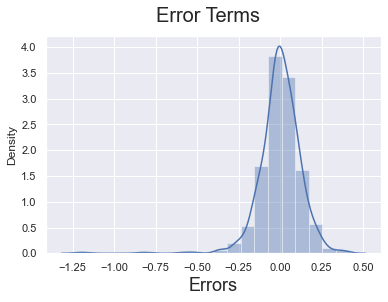

In [347]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

In [351]:
#evalate training model
r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
round(r2,2)

0.89

In [353]:
# Residual analysis
y_residual = (y_train - y_train_pred)

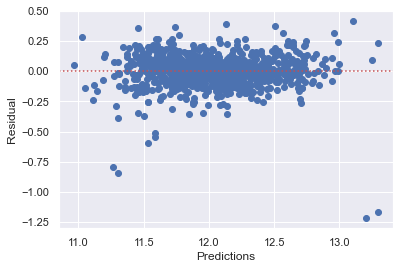

In [354]:
plt.scatter( y_train_pred , y_residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and evaluation of Test dataset

In [356]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Property_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,0.361992,-0.293313,-0.430911,-0.765065,-0.787597,-0.124502,-1.228053,-0.837450,-0.247791,-1.026085,-0.751723,0.176772,-0.234155,-0.925422,0.265498,-0.743160,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.468306,-0.018714,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
57,0.035976,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,-0.963574,-0.293313,-0.439628,-0.775120,1.189021,-0.124502,0.381706,-0.837450,-0.247791,0.786428,1.246998,0.176772,-0.234155,-0.925422,0.439515,-0.743160,0.349201,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,0.623338,-1.138774,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.963574,-0.293313,0.381881,0.212779,-0.787597,-0.124502,-0.496515,-0.837450,-0.247791,0.786428,-0.751723,0.176772,-0.234155,0.623522,-0.327104,1.025020,-0.391783,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.104424,-0.809344,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [358]:
# Selecting columns from X_test based on X_train_new after eliminating features
X_test_new = X_test[X_train_new.columns]

In [359]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [360]:
# Predicting on 
y_pred = lm.predict(X_test_new)

In [361]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.85

Text(0, 0.5, 'y_pred')

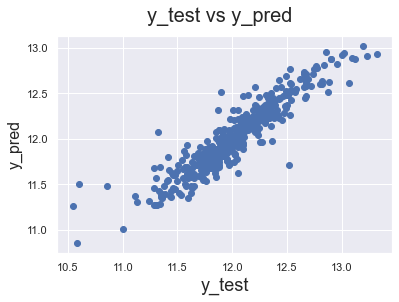

In [362]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)          

#### R2 Score of train and test data
*Train dataset = 0.89*

Test dataset = 0.85 

In [404]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8930152524415722
0.8513292418603443
17.170001765933044
10.714345899822382
0.01681684795879828
0.02446197694023375


### Lasso & Ridge Regression

In [453]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [454]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [455]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064131,0.010859,0.002434,0.000470,0.0001,{'alpha': 0.0001},-0.100471,-0.095467,-0.105110,-0.086457,-0.095505,-0.096602,0.006209,2,-0.080903,-0.071647,-0.075417,-0.083951,-0.081647,-0.078713,0.004509
1,0.011608,0.000942,0.001797,0.000204,0.001,{'alpha': 0.001},-0.095540,-0.097606,-0.101575,-0.081802,-0.092582,-0.093821,0.006684,1,-0.085661,-0.078281,-0.080558,-0.088396,-0.085617,-0.083703,0.003710
2,0.004459,0.000476,0.001715,0.000244,0.01,{'alpha': 0.01},-0.094641,-0.107025,-0.108457,-0.093789,-0.100375,-0.100858,0.006077,3,-0.100275,-0.089124,-0.095578,-0.101045,-0.102146,-0.097634,0.004809
3,0.004427,0.000680,0.001910,0.000264,0.05,{'alpha': 0.05},-0.118223,-0.131712,-0.129135,-0.125166,-0.129246,-0.126697,0.004728,4,-0.129426,-0.115298,-0.123820,-0.127826,-0.129323,-0.125139,0.005323
4,0.003570,0.000333,0.001663,0.000108,0.1,{'alpha': 0.1},-0.158579,-0.170943,-0.162360,-0.159240,-0.163472,-0.162919,0.004413,5,-0.163635,-0.156078,-0.160377,-0.162155,-0.166492,-0.161747,0.003472


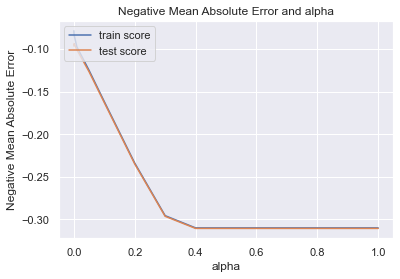

In [456]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [457]:
# At alpha = 0.01

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.02478196, -0.00559383,  0.01759968,  0.09710551,  0.04624507,
        0.02544126, -0.        , -0.00447029, -0.00187903,  0.02061958,
        0.        ,  0.00057351, -0.00083703,  0.10844736,  0.03265716,
        0.00363681,  0.01981773,  0.01431613,  0.01453734, -0.00682031,
        0.00483647,  0.03867847,  0.01231154, -0.00392605,  0.00644766,
        0.00504778,  0.01195745, -0.02152264, -0.00192854, -0.00050156,
       -0.05746903,  0.01246357,  0.        ,  0.0589797 , -0.        ,
        0.        , -0.04040237,  0.        ,  0.02415862, -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.00634657,
        0.04260044, -0.        ,  0.12157561, -0.07168463, -0.        ,
       -0.04283508, -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.04498274,  0.09234957, -0.        ,  0.        ,
       -0.00680036, -0.        ,  0.08721206,  0.02962037,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

Lasso results in zero coeff of insignificant variables

In [458]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.979),
 ('MSSubClass', -0.025),
 ('LotFrontage', -0.006),
 ('LotArea', 0.018),
 ('OverallQual', 0.097),
 ('OverallCond', 0.046),
 ('YearRemodAdd', 0.025),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.004),
 ('BsmtFinSF2', -0.002),
 ('TotalBsmtSF', 0.021),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.001),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.108),
 ('BsmtFullBath', 0.033),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.02),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', 0.005),
 ('GarageArea', 0.039),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', -0.004),
 ('EnclosedPorch', 0.006),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.022),
 ('MiscVal', -0.002),
 ('MoSold', -0.001),
 ('Property_Age', -0.057),
 ('MSZoning_FV', 0.012),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.059),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.04),
 ('LotShape_Reg', 0.0),
 ('LotConfig_CulDSac', 0.024),
 ('LotConfig_FR2', -0.0

In [459]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8575173193750567
0.8526093653239735


In [460]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.155728443424319


In [461]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [462]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.979
1,MSSubClass,-0.025
2,LotFrontage,-0.006
3,LotArea,0.018
4,OverallQual,0.097


In [463]:
#sorting features
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.979
48,Neighborhood_Crawfor,0.122
14,GrLivArea,0.108
4,OverallQual,0.097
58,Neighborhood_NridgHt,0.092
63,Neighborhood_Somerst,0.087
81,Exterior1st_BrkFace,0.061
34,MSZoning_RL,0.059
127,BsmtExposure_Gd,0.046
5,OverallCond,0.046


In [464]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.979
48,Neighborhood_Crawfor,0.122
14,GrLivArea,0.108
4,OverallQual,0.097
58,Neighborhood_NridgHt,0.092
63,Neighborhood_Somerst,0.087
81,Exterior1st_BrkFace,0.061
34,MSZoning_RL,0.059
127,BsmtExposure_Gd,0.046
5,OverallCond,0.046


In [465]:
pred.shape

(70, 2)

In [466]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'Neighborhood_Crawfor', 'GrLivArea', 'OverallQual', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Exterior1st_BrkFace', 'MSZoning_RL', 'BsmtExposure_Gd', 'OverallCond', 'Neighborhood_NoRidge', 'Neighborhood_ClearCr', 'GarageArea', 'BsmtFullBath', 'Neighborhood_StoneBr', 'GarageType_Attchd', 'Foundation_PConc', 'YearRemodAdd', 'LotConfig_CulDSac', 'TotalBsmtSF', 'FullBath', 'Exterior2nd_MetalSd', 'LotArea', 'Exterior2nd_VinylSd', 'ExterQual_Gd', 'BedroomAbvGr', 'ExterCond_TA', 'HalfBath', 'BsmtFinType1_GLQ', 'MSZoning_FV', 'ScreenPorch', 'WoodDeckSF', 'EnclosedPorch', 'Neighborhood_BrkSide', 'Fireplaces', '3SsnPorch', 'BsmtHalfBath', 'FireplaceQu_Gd', 'MasVnrType_BrkFace', 'Exterior1st_VinylSd', '2ndFlrSF', 'MoSold', 'LowQualFinSF', 'BsmtFinSF2', 'MiscVal', 'BsmtFinType1_Rec', 'KitchenQual_Gd', 'BsmtFinType1_NA', 'OpenPorchSF', 'GarageFinish_RFn', 'BsmtFinSF1', 'RoofStyle_Gable', 'LotFrontage', 'KitchenAbvGr', 'Neighborhood_Sawyer', 'BsmtQual_NA', 'BsmtQual_TA', 'GarageF

In [467]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
210,-1.228053,-0.779861,0.383154,-0.430911,-2.217786,0.043512,-0.925422,-0.473765,-0.115302,1.066863,0,-0.709347,-1.026085,-0.275126,-0.743160
318,2.123103,0.649651,-0.533005,0.621579,0.867506,1.160345,0.623522,-0.056845,0.926898,1.066863,1,0.197980,0.786428,-0.275126,1.989482
239,-0.056465,-0.065105,-1.449164,-0.712011,-1.183084,-0.761296,0.623522,-0.169324,-0.794998,-0.837450,0,1.407748,-1.026085,-0.275126,-0.743160
986,0.221858,-0.065105,2.215472,-1.256778,-1.018473,-0.963574,-0.925422,-0.502297,-0.477806,-0.837450,0,-0.709347,-1.026085,-0.275126,2.423490
1416,1.453624,-1.494617,0.383154,-0.620490,0.416000,-0.963574,-0.925422,0.082905,-0.432493,-0.837450,1,-0.709347,0.786428,-0.275126,-0.743160


In [468]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
1436,-1.228053,-1.494617,0.383154,-0.430911,0.265498,0.361992,-0.925422,-0.144189,-0.432493,-0.837450,1,-0.709347,-1.026085,-0.275126,-0.743160
57,0.381706,0.649651,-0.533005,-0.439628,0.439515,-0.963574,-0.925422,0.112505,0.881585,-0.837450,1,0.349201,0.786428,-0.275126,-0.743160
780,-0.496515,0.649651,-0.533005,0.381881,-0.327104,-0.963574,0.623522,-0.253368,-0.296554,-0.837450,1,-0.391783,0.786428,-0.275126,1.025020
382,0.526509,0.649651,-0.533005,-0.267481,0.787551,-0.963574,-0.925422,-0.120412,0.428455,-0.837450,1,0.092125,0.786428,-0.275126,0.414194
1170,-0.750391,-0.065105,0.383154,0.074633,-0.534044,0.159714,0.623522,-0.058786,0.292515,1.066863,0,-0.709347,-1.026085,-0.275126,0.888388


### Ridge Regression

In [469]:
#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [470]:
print(model_cv.best_params_)

{'alpha': 50}


In [438]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008187,0.006403,0.002403,0.000271,0.0001,{'alpha': 0.0001},-0.103374,-0.097556,-0.107910,-0.097630,-0.100330,-0.101360,0.003909,27,-0.081037,-0.070932,-0.075185,-0.083050,-0.081387,-0.078318,0.004551
1,0.006262,0.000808,0.002661,0.000377,0.001,{'alpha': 0.001},-0.103363,-0.097551,-0.107904,-0.097580,-0.100323,-0.101344,0.003917,26,-0.081036,-0.070933,-0.075183,-0.083053,-0.081387,-0.078319,0.004552
2,0.004776,0.000317,0.002495,0.000337,0.01,{'alpha': 0.01},-0.103255,-0.097503,-0.107844,-0.097115,-0.100250,-0.101193,0.003991,25,-0.081027,-0.070946,-0.075165,-0.083077,-0.081389,-0.078321,0.004554
3,0.005446,0.000805,0.002848,0.000414,0.05,{'alpha': 0.05},-0.102895,-0.097326,-0.107679,-0.095511,-0.099966,-0.100675,0.004298,24,-0.081000,-0.071004,-0.075089,-0.083195,-0.081405,-0.078339,0.004570
4,0.005395,0.000347,0.002507,0.000288,0.1,{'alpha': 0.1},-0.102593,-0.097149,-0.107514,-0.093943,-0.099643,-0.100168,0.004647,23,-0.080983,-0.071074,-0.075023,-0.083321,-0.081437,-0.078368,0.004586


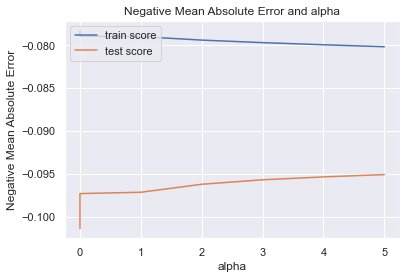

In [439]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [440]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.40846237e-02, -7.85355843e-03,  1.95787034e-02,  7.77310707e-02,
        4.27855422e-02,  2.34313497e-02, -5.51049533e-03, -1.40945405e-02,
       -4.63858516e-03,  1.08466747e-02,  3.36913564e-02,  4.48048285e-02,
        2.20199023e-03,  6.20640337e-02,  2.98137070e-02,  4.09924577e-03,
        2.41065171e-02,  1.62838905e-02,  2.17214864e-02, -6.93335688e-03,
       -3.77619929e-03,  3.59400150e-02,  1.18448561e-02, -5.57165563e-03,
        8.26318008e-03,  5.57112229e-03,  1.00484753e-02, -1.71391199e-02,
       -2.03155037e-03,  1.62922791e-04, -3.59197881e-02,  1.35117702e-01,
        1.37234918e-01,  1.65341105e-01,  1.27856317e-01,  2.69305388e-02,
       -9.65815299e-02,  7.97370521e-03,  3.26039436e-02, -5.32810414e-02,
       -4.12732713e-02, -3.33988407e-03, -2.17514116e-02, -8.69943150e-02,
        2.20413197e-02,  6.97558585e-02,  1.97289209e-03,  1.48531007e-01,
       -9.29192267e-02,  3.51826049e-03, -8.42235536e-02, -1.33904186e-01,
       -1.95191833e-02, -

In [441]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.967),
 ('MSSubClass', -0.024),
 ('LotFrontage', -0.008),
 ('LotArea', 0.02),
 ('OverallQual', 0.078),
 ('OverallCond', 0.043),
 ('YearRemodAdd', 0.023),
 ('MasVnrArea', -0.006),
 ('BsmtFinSF1', -0.014),
 ('BsmtFinSF2', -0.005),
 ('TotalBsmtSF', 0.011),
 ('1stFlrSF', 0.034),
 ('2ndFlrSF', 0.045),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.062),
 ('BsmtFullBath', 0.03),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.024),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.022),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', -0.004),
 ('GarageArea', 0.036),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', -0.006),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.01),
 ('PoolArea', -0.017),
 ('MiscVal', -0.002),
 ('MoSold', 0.0),
 ('Property_Age', -0.036),
 ('MSZoning_FV', 0.135),
 ('MSZoning_RH', 0.137),
 ('MSZoning_RL', 0.165),
 ('MSZoning_RM', 0.128),
 ('LotShape_IR2', 0.027),
 ('LotShape_IR3', -0.097),
 ('LotShape_Reg', 0.008),
 ('LotConfig_CulDSac', 0.033),
 ('LotConfig_FR2

In [442]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9120838400163847
0.8744509959065225


In [443]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14372742146192807


In [444]:
# Performance is better with Lasso

In [445]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [446]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.967
34,MSZoning_RL,0.165
48,Neighborhood_Crawfor,0.149
33,MSZoning_RH,0.137
32,MSZoning_FV,0.135
58,Neighborhood_NridgHt,0.131
35,MSZoning_RM,0.128
64,Neighborhood_StoneBr,0.116
63,Neighborhood_Somerst,0.116
81,Exterior1st_BrkFace,0.106


In [447]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.967
34,MSZoning_RL,0.165
48,Neighborhood_Crawfor,0.149
33,MSZoning_RH,0.137
32,MSZoning_FV,0.135
58,Neighborhood_NridgHt,0.131
35,MSZoning_RM,0.128
64,Neighborhood_StoneBr,0.116
63,Neighborhood_Somerst,0.116
81,Exterior1st_BrkFace,0.106


In [448]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.967
34,MSZoning_RL,0.165
48,Neighborhood_Crawfor,0.149
33,MSZoning_RH,0.137
32,MSZoning_FV,0.135
58,Neighborhood_NridgHt,0.131
35,MSZoning_RM,0.128
64,Neighborhood_StoneBr,0.116
63,Neighborhood_Somerst,0.116
81,Exterior1st_BrkFace,0.106


In [450]:
pred

,Variable,Coeff
0,constant,12.009
4,OverallQual,0.125
14,GrLivArea,0.108
22,GarageArea,0.045
21,Fireplaces,0.035
6,YearRemodAdd,0.033
5,OverallCond,0.031
15,BsmtFullBath,0.031
10,TotalBsmtSF,0.021
23,WoodDeckSF,0.013


These are the final features that should be selected for predicting house prices

Thus the equation is:

Ln(y) = C + 0.125(x1) + 0.108(x2) + 0.045(x3) + 0.035(x4) + 0.033(x5) + 0.031(x6) + 0.031(x7) + 0.021(x8) + 0.013(x9) + 0.012(x10) + 0.011(x11) + 0.011(x12) + 0.007(x13) + 0.005(x14) + 0.004(x15) - 0.001(x16) - 0.018(x17) - 0.020(x18) - 0.074(x19) 


Positive coeff suggests that it helps increase the price of house and negative coeff suggests that the variable decreases the price